In [1]:
import os 
import csv
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from general_plot import *



model_name = model_name_list[1] # Java_nio: 
all_mutants = list_dir(join_path("merged_mutants", f'{system_map[model_name][0]}'))

print(all_mutants)



In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /home/nour/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


['32', '31', '30', '29', '28', '27', '26', '25', '24', '23', '22', '21', '20', '19', '18', '17', '16', '15', '14', '13', '12', '11', '10', '9', '8', '7', '6', '5', '4', '3', '2', '1', '0']


In [2]:
bes_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_loops.csv'))
rand_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_loops.csv'))

bes_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_bes_no_loops.csv'))
rand_no_lo_k_csv = pd.read_csv(os.path.join('csvs', f'killed_{model_name}_random_no_loops.csv'))

dfs = (bes_lo_k_csv, rand_lo_k_csv, bes_no_lo_k_csv, rand_no_lo_k_csv)

In [3]:
#calculate mutation score for each model = killed / all mutants
ms_bes_l = get_mutation_score(bes_lo_k_csv, all_mutants)
ms_rand_l = get_mutation_score(rand_lo_k_csv, all_mutants)
ms_bes_no_l = get_mutation_score(bes_no_lo_k_csv, all_mutants)
ms_rand_no_l = get_mutation_score(rand_no_lo_k_csv, all_mutants)

print(f'mutation score for bes_loop in model {model_name}: {ms_bes_l[1]} of {ms_bes_l[2]} = {ms_bes_l[0]*100}%')
print(f'mutation score for rand_loop in model {model_name}: {ms_rand_l[1]} of {ms_rand_l[2]} = {ms_rand_l[0]*100}%')
print(f'mutation score for bes_no_loop in model {model_name}: {ms_bes_no_l[1]} of {ms_bes_no_l[2]} = {ms_bes_no_l[0]*100}%')                    
print(f'mutation score for rand_no_loop in model {model_name}: {ms_rand_no_l[1]} of {ms_rand_no_l[2]} = {ms_rand_no_l[0]*100}%')




mutation score for bes_loop in model JavaNioServerSocket3: 14 of 33 = 42.42424242424242%
mutation score for rand_loop in model JavaNioServerSocket3: 13 of 33 = 39.39393939393939%
mutation score for bes_no_loop in model JavaNioServerSocket3: 12 of 33 = 36.36363636363637%
mutation score for rand_no_loop in model JavaNioServerSocket3: 14 of 33 = 42.42424242424242%


In [4]:
m_lists = get_killed_mutant_all(dfs)
(bes_m_l_list, rand_m_l_list, bes_m_no_l_list, rand_m_no_l_list) = m_lists 

d_map = {
    'bar_width' : 0.5, 
    'x_distance': 3,
    'fig_width' : 10,
    'fig_hight' : 5,
    'x_lim' : 25,
    'y_lim' : 200,
    
    'x_label': 'Killed mutant number', 
    'y_label': 'UnKnown', 
    'title': f"The different algorithms' performance on killed mutant for {model_name}",
    
    'bes_l_label': 'bes_loops',
    'random_l_label': 'random_loops',
    'bes_no_l_label': 'bes_no_self_loops',
    'random_no_l_label': 'random_no_self_loops' ,
    
    'model_name': model_name, 
    'comp_type' : "unknown"
    
    
}




labels: ['0' '2' '4' '7' '9' '11' '12' '15' '18' '19' '21' '23' '26' '27' '6' '31']
mutant 6 not_found
mutant 31 not_found
mutant 9 not_found
mutant 15 not_found
mutant 31 not_found
mutant 2 not_found
mutant 15 not_found
mutant 26 not_found
mutant 6 not_found
mutant 31 not_found
mutant 9 not_found
mutant 15 not_found
bes_l data: [15, 188, 15, 15, 7365, 1, 204, 640, 1, 6, 20, 20, 188, 22, 0, 0]
rand_l data: [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0]
bes_no_l data: [15, 0, 15, 15, 51, 1, 175, 0, 1, 6, 19, 19, 0, 18, 0, 0]
rand_no_l data: [1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 4, 1, 3, 1263]


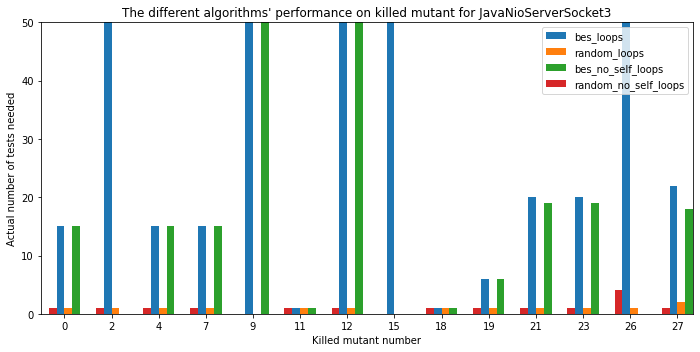

In [11]:

#################################
## Manually:
#################################

# actual_size

# desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]  # +6 +31
extras = np.array([6, 31])
desired_mutants  = np.append(desired_mutants, extras)


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'actual_tests'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['y_label'] = "Actual number of tests needed"
d_map['comp_type'] = creteria
d_map['x_lim'] = 40
d_map['y_lim'] = 50


plot_4_bars(labels, c_lists, d_map)


labels: ['0', '2', '4', '7', '9', '11', '12', '15', '18', '19', '21', '23', '26', '27']
mutant 9 not_found
mutant 15 not_found
mutant 2 not_found
mutant 15 not_found
mutant 26 not_found
mutant 9 not_found
mutant 15 not_found
bes_l data: [0.8005120754241943, 1.4977729320526123, 1.0507712364196775, 1.0791161060333252, 15.532056093215942, 1.133347988128662, 1.4482200145721436, 3.9131228923797607, 1.8979918956756592, 1.5761969089508057, 1.9288690090179443, 1.8422341346740725, 3.2855029106140137, 2.096780776977539]
rand_l data: [1.6618549823760986, 2.459933996200561, 2.125711679458618, 1.9082458019256592, 0, 2.2094957828521733, 2.1492180824279785, 0, 1.0240411758422852, 0.8109669685363771, 0.8690989017486572, 1.536742925643921, 0.8674240112304688, 1.0656099319458008]
bes_no_l data: [1.65112566947937, 0, 2.3261468410491943, 2.1629581451416016, 2.0950968265533447, 0.9049818515777588, 1.6843738555908203, 0, 1.320136308670044, 0.9812397956848145, 1.5799429416656494, 1.232374906539917, 0, 1.0790

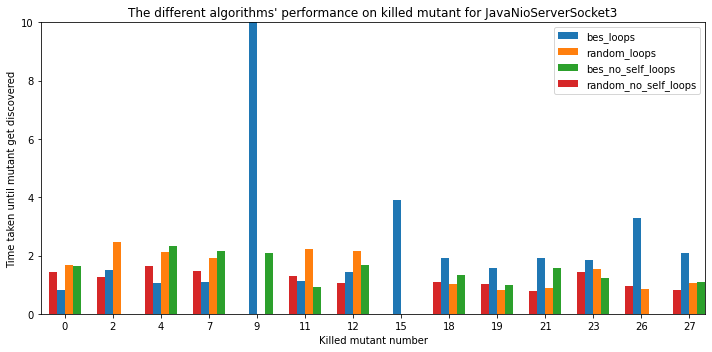

In [12]:
# time_requierd

desired_mutants = m_lists[0][0:6]
desired_mutants = m_lists[0]


labels = desired_mutants
print(f'labels: {labels}')

creteria =  'time_taken'# 'time_taken' # 'actual_tests'

c_lists = get_cretiera_all_desired_m(dfs, desired_mutants, creteria, 0)
(bes_lo_c, rand_lo_c, bes_no_lo_c, rand_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 10

plot_4_bars(labels, c_lists, d_map)



mutant 2 not_found
mutant 15 not_found
mutant 26 not_found


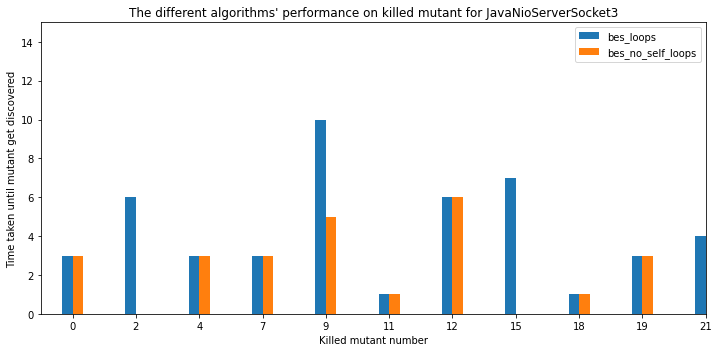

In [7]:
# depth
creteria = 'depth'
c_lists = get_cretiera_only_2(dfs, desired_mutants, creteria, 0)
(bes_lo_c, bes_no_lo_c) = c_lists

d_map['comp_type'] = creteria

d_map['y_label'] = "Time taken until mutant get discovered"

# 'bar_width' : 0.5, 
#     'x_distance': 3,
#     'fig_width' : 10,
#     'fig_hight' : 5,
#     'x_lim' : 25,
d_map['y_lim'] = 15


plot_2_bars(labels, c_lists, d_map)

